In [1]:
#1-Import the necessary libraries


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import mean_absolute_error

In [3]:
#2-Load the we_fn_use_c_marketing_customer_value_analysis.csv 
#into the variable customer_df.

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

#3First look at its main features (head, shape, info).
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
column_names = customer_df.columns
column_names

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
#4Rename the columns so they follow the PE8 (snake case).
#Standardize header names
customer_df= customer_df.rename(columns={'EmploymentStatus':'Employment_Status',
                            'Customer Lifetime Value':'Customer_Lifetime_Value', 
                            'Effective To Date':'Effective_To_Date'})
customer_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#5Change effective to date column to datetime format.
#customer_df1=customer_df.rename(columns={'Customer Lifetime Value', 'EmploymentStatus': 'Customer_Lifetime_Value','Employment_Status'}, inplace=True)
#customer_df1

customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])

customer_df['Effective_To_Date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective_To_Date, Length: 9134, dtype: datetime64[ns]

In [7]:
#6-Check NaN values per column.
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
Employment_Status                0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [8]:
display(customer_df.dtypes)

Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
Employment_Status                        object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [9]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [10]:
customer_df['Number of Policies'].value_counts(dropna=False)

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number of Policies, dtype: int64

In [11]:
#numericals['Number of Policies'].fillna(customer_df['Number of Policies'].mean()).hist()

In [12]:
#customer_df = customer_df.astype(object).replace(np.nan, 'No')
#display(customer_df.head())

In [13]:
display(customer_df.describe())

,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
num_cols = customer_df._get_numeric_data().columns
num_cols

Index(['Customer_Lifetime_Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [15]:
#numCols = customer_df.select_dtypes("number").columns
#catCols = customer_df.select_dtypes("object").columns
#numCols= list(set(numCols))
#catCols= list(set(catCols))

In [16]:
#customer_df['Vehicle Size'].hist(bins=20)

In [17]:
#customer_df['Number of Policies'].unique()[0:20]

In [18]:
#customer_df['Vehicle Size'].hist(bins=20)

In [19]:
#numCols1 = customer_df.select_dtypes(include=['category'])

#numCols2 = customer_df.select_dtypes(exclude=['int','float']).dtypes


In [20]:
#customer_df['Income'].hist(bins=20)

In [21]:
categoricals=customer_df.select_dtypes('object')
display(categoricals)

,Customer,State,Response,Coverage,Education,Employment_Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [22]:
numerical=customer_df._get_numeric_data()
display(numerical)

,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [23]:
customer_df = customer_df.drop(['Customer'],axis=1)

In [24]:
#7-Define a function that differentiates between continuous and 
#discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable
#and do the same for discrete and categorical.
def con_dis(data):
    con = data.select_dtypes(float)
    dis = data.select_dtypes(exclude=['float','object','datetime'])
    categoricals = data.select_dtypes(object)
    return con, dis, categoricals

con, dis, categoricals = con_dis(customer_df)
categoricals.head(10)
    

,State,Response,Coverage,Education,Employment_Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Offer2,Branch,Four-Door Car,Medsize


In [25]:
customer_df

,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [26]:
#8-For the categorical data, 
#check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, 
#decide what to do with the variables you get.

#It is already cleaned



In [27]:
#9-Get categorical features.
#get the distribution of the Numerical features
Numerical_features =customer_df.describe()

#get the disctibution of the categorical features
categorical_features= customer_df.describe(include=['O'])

#get the distribution for both categorical and numerical features
Both_features =customer_df.describe(include='all')

<ipython-input-27-9613540aee07>:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Both_features =customer_df.describe(include='all')


In [28]:
categorical_features

,State,Response,Coverage,Education,Employment_Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [29]:
#10-What should we do with the customer_id column?
#customer_df = customer_df.drop(['Customer'],axis=1)

# Lab 2

In [30]:
corr_cons = con.corr()
display(corr_cons)

,Customer_Lifetime_Value,Total Claim Amount
Customer_Lifetime_Value,1.000000,0.226451
Total Claim Amount,0.226451,1.000000


In [31]:
corr_dis = dis.corr()
display(corr_dis)

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
Monthly Premium Auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
Months Since Last Claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
Months Since Policy Inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
Number of Open Complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
Number of Policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


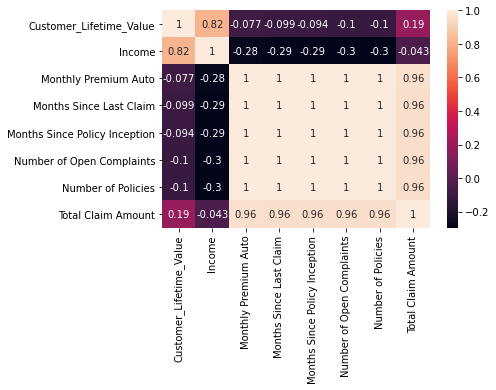

In [32]:
#1 and 2 already done above
#3Plot a correlation matrix, what can you see?

correlations_matrix = Numerical_features.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()



In [33]:
#4-Create a function to plot every discrete variables. 
#Do the same with continuous variables (be careful, you may change 
#the plot type to another one better suited for continuous data).
def dis_plot(df):
    for c in df:
        sns.displot(x=c, data=df)

    return None





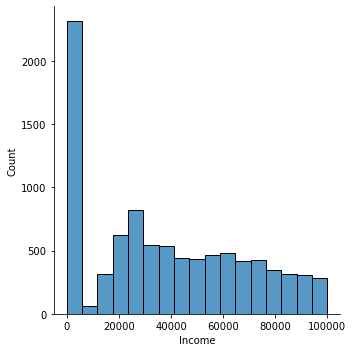

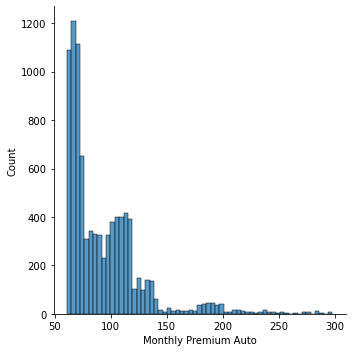

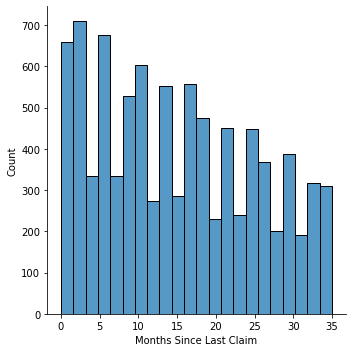

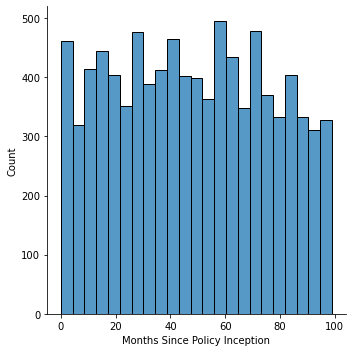

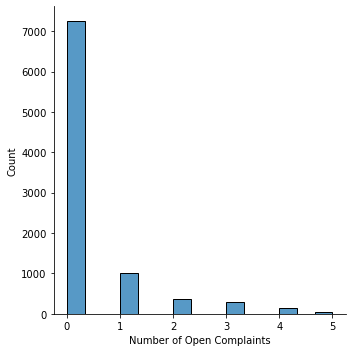

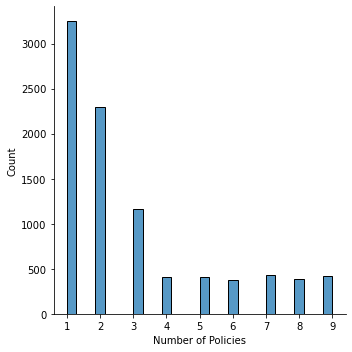

In [34]:
dis_plot(dis)

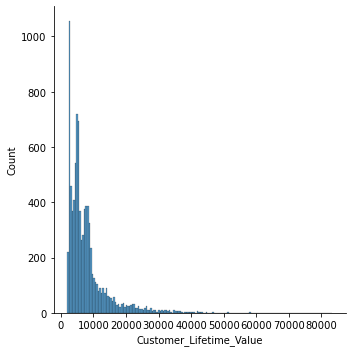

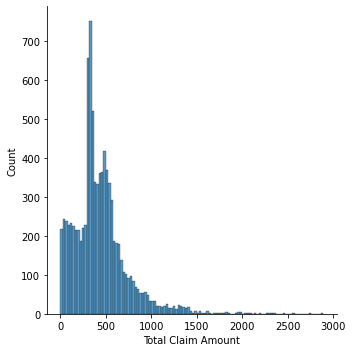

In [35]:
def con_plot(df):
    for c in df:
        sns.displot(x=c, data=df)

    return None
con_plot(con)

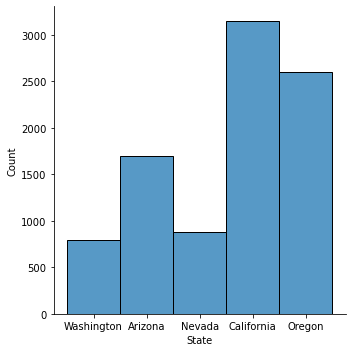

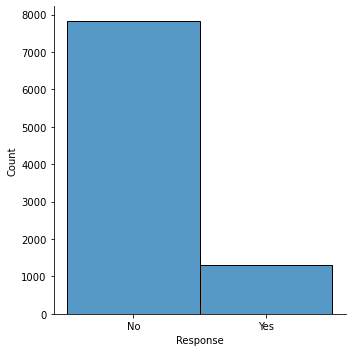

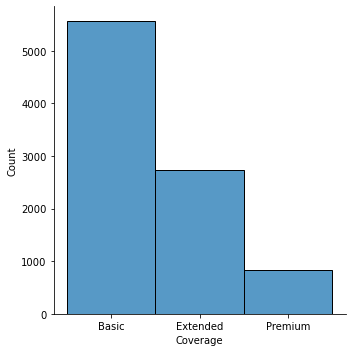

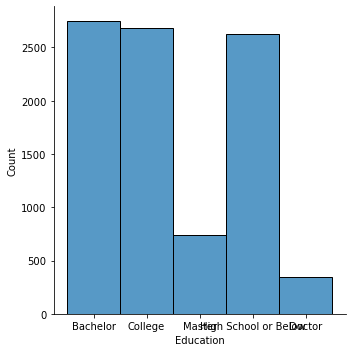

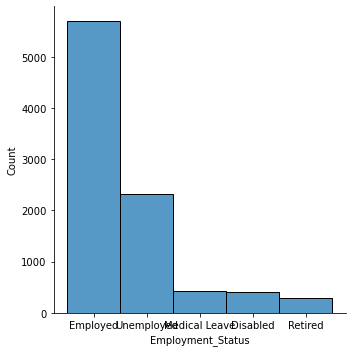

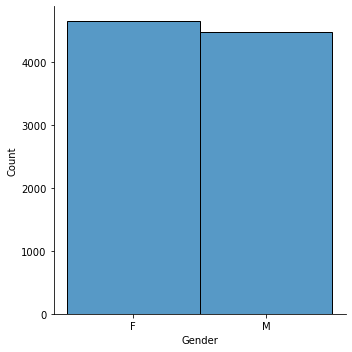

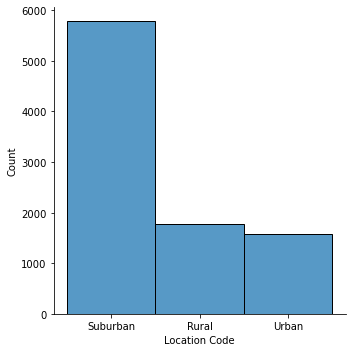

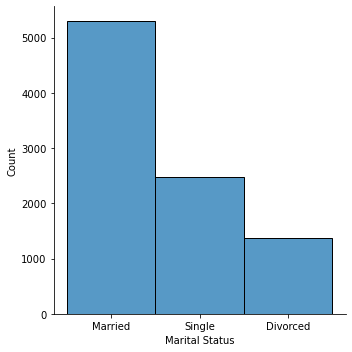

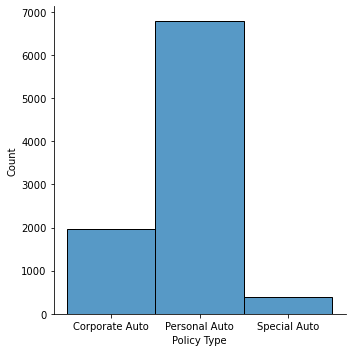

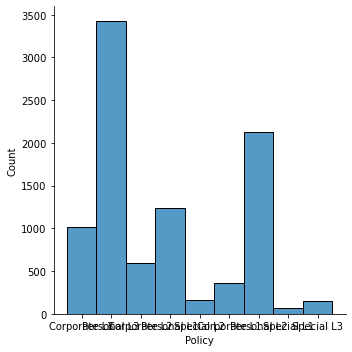

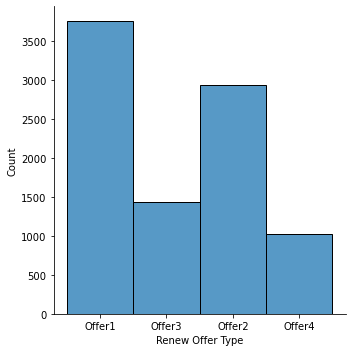

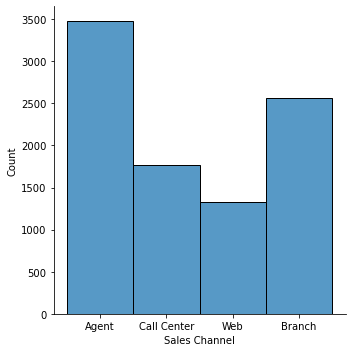

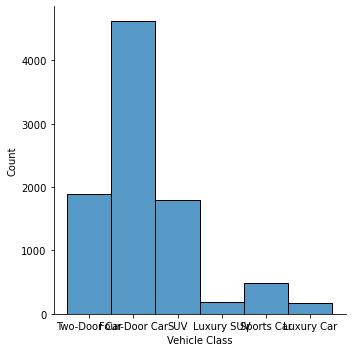

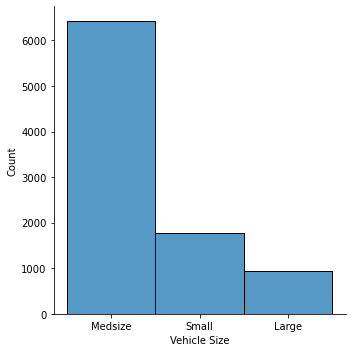

In [36]:
def cat_plot(df):
    for c in df:
        sns.displot(x=c, data=df)

    return None
cat_plot(categoricals)

In [37]:
#5-What can you see in the plots?

#Income has really large null values 

#6-Look for outliers in the continuous variables we have found. 
#Hint: There was a good plot to do that.

#We can use boxplot to see the outliers as we have done below and then we can do imputing or replace with 0.



<AxesSubplot:>

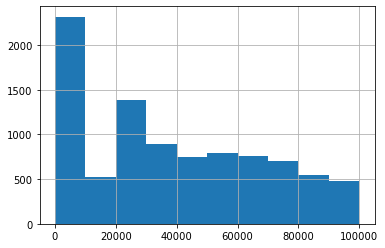

In [38]:
numericals['Income'].fillna(dis['Income'].mean()).hist()

<AxesSubplot:ylabel='Customer_Lifetime_Value'>

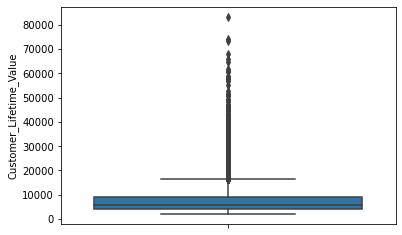

In [39]:
sns.boxplot(y=con['Customer_Lifetime_Value'])


<AxesSubplot:ylabel='Total Claim Amount'>

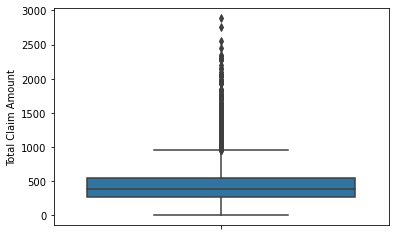

In [40]:
sns.boxplot(y=con['Total Claim Amount'])

In [41]:

#sns.barplot(x='Customer_Lifetime_Value', data= categorical_features, palette='rainbow')
#plt.title("X-Y")

# lab-feature-extraction


In [90]:
#1-Open the categoricals variable we created before
categoricals = customer_df.select_dtypes(np.object)
categoricals.head(5)


<ipython-input-90-4eba0112a052>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,State,Response,Coverage,Education,Employment_Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [43]:
#2-Plot all the categorical variables with the proper plot. What can you see?
#Done above

In [44]:
#3-There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
#No coloum is redundan

In [45]:
#4-Plot time variable. Can you extract something from it?

In [46]:
time_df = pd.DataFrame()
time_df['day'] = customer_df['Effective_To_Date'].dt.day
time_df['week'] = customer_df['Effective_To_Date'].dt.week
time_df['month'] = customer_df['Effective_To_Date'].dt.month
time_df['target'] = customer_df['Total Claim Amount']

<ipython-input-46-7c6d303d263e>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time_df['week'] = customer_df['Effective_To_Date'].dt.week


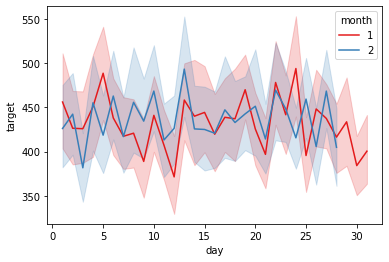

In [47]:
sns.lineplot(x = time_df.day, y= time_df.target, hue= time_df.month, palette='Set1');

In [48]:
time_df.week=time_df.week.apply(lambda x:0 if x==52 else x)

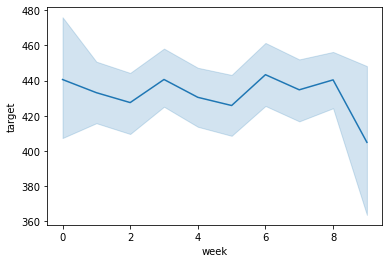

In [49]:
sns.lineplot(x = time_df.week, y= time_df.target); #clear view

# Lab | Data cleaning and wrangling

In [50]:
#1-We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
#2-Create a copy of the dataframe for the data wrangling.
#3-Normalize the continuous variables. You can use any one method you want.
#4-Encode the categorical variables
#5-The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
#6-Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [51]:
X = numericals.drop(['Total Claim Amount'],axis=1)
y = numericals['Total Claim Amount']

In [52]:
numericals.isnull().sum()/len(numericals)

Customer_Lifetime_Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Total Claim Amount               0.0
dtype: float64

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [54]:
X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X_normalized

,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [55]:
# numericals["Total Claim Amount"] =  numericals["Total Claim Amount"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [56]:
np.all(np.isfinite( numericals))

True

In [57]:
np.any(np.isnan(numericals))

False

In [58]:
numericals = numericals.reset_index()

In [59]:
#numericals.replace([np.inf, -np.inf], np.nan, inplace=True)

In [60]:
numericals.fillna(0, inplace=True)

In [61]:
X = numericals.drop(['Total Claim Amount'],axis=1)
y = numericals['Total Claim Amount']

In [62]:
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler().fit(X)
x_standardized = Standardtransformer.transform(X)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=X.columns)
x_standardized.head()

(9134, 8)


,index,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,-1.731861,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648
1,-1.731482,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160
2,-1.731103,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247
3,-1.730723,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759
4,-1.730344,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648


In [63]:
X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X_normalized

,index,Customer_Lifetime_Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.000000,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.000109,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.000219,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.000328,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.000438,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...,...
9129,0.999562,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.999672,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.999781,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.999891,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [106]:
#ONE ENCONDING
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(categoricals)

print(encoder.categories_)
encoded = encoder.transform(categoricals).toarray()
print(encoded)
#ENCODED IS A NESTED ARRAY
final_cols = []
for item in encoder.categories_:
    print(item)
    final_cols.extend(item)
print(final_cols)
#encoded = encoder.transform(X_cat).toarray()
#print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=final_cols)
onehot_encoded.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
X = pd.concat([X_normalized, onehot_encoded], axis=1)

In [108]:
numericals.shape

(9134, 9)

In [109]:
y = numericals['Total Claim Amount']
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 65)
(1827, 65)
(7307,)
(1827,)


In [112]:
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7620426543880937

In [114]:
y_test

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4855    665.931223
1880     33.970000
8472     43.155950
5967    453.600000
7971    852.460341
Name: Total Claim Amount, Length: 1827, dtype: float64

In [115]:
predictions

array([200., 468., 458., ..., 204., 532., 658.])

In [116]:
from sklearn.metrics import mean_squared_error, r2_score

In [117]:
mse = mean_squared_error(y_test, predictions)
print(mse)

18920.236208122962


In [118]:
rmse = math.sqrt(mse)
print(rmse)

137.55084953617322


In [119]:
r2 = r2_score(y_test, predictions)
r2

0.7620426543880937

# Lab 3

In [136]:
narrowdown_c = customer_df[(customer_df['Coverage']== 'Basic')|(customer_df['Coverage'] == 'Extended')|(customer_df['Coverage'] == 'Premium')]

In [135]:
data_crosstab = pd.crosstab(narrowdown_c['Coverage'],narrowdown_c['Location Code'], margins = False)
data_crosstab

Location Code,Rural,Suburban,Urban
Coverage,,,
Basic,1100,3448,1020
Extended,526,1747,469
Premium,147,584,93


In [ ]:
import scipy.stats as st
st.chi2_contingency(data_crosstab) 
#Related to each other

In [132]:
narrowdown_customer = customer_df[(customer_df['Education']== 'Master')|(customer_df['Education'] == 'Bachelor')|(customer_df['Education'] == 'College')]

In [133]:
data_crosstab = pd.crosstab(narrowdown_customer['Education'],narrowdown_customer['Vehicle Size'], margins = False)
data_crosstab

Vehicle Size,Large,Medsize,Small
Education,,,
Bachelor,255,1968,525
College,274,1902,505
Master,89,494,158


In [131]:
#st.chi2_contingency(np.array(customer_df))

In [125]:
import scipy.stats as st
st.chi2_contingency(data_crosstab) 
#Related to each other

(7.9080350010589,
 0.019177501181360367,
 2,
 array([[ 270.94067068, 1939.11607911,  537.94325021],
        [  73.05932932,  522.88392089,  145.05674979]]))